 # Categorización de publicaciones de productos de Mercado Libre

 Autores: Maximiliano Tejerina, Eduardo Barseghian, Benjamín Ocampo

 ## Reducción del dataset y definición de funciones *helper*
 Luego de realizar la reducción del dataset a un total de 20 categorías y
 646760 publicaciones, es colocado disponible en un servidor permitiendo ser
 accedido por medio de una URL.

 Inicialmente se definen constantes y funciones que permiten obtener
 información cuantitativa de las publicaciones así como de su estructura. Por
 un lado, `count_stopwords`, `count_special_chars`, `count_digits`, permiten
 hacer conteos sobre la estructura de las publicaciones, cuando en contraparte
 `proportion` permite hacer una comparación entre cantidades de grupos de
 interés. También se definen nuestras variables aleatorias o columnas
 relevantes y un conjunto `stopwords` que almacena palabras como articulos, o
 proposiciones frecuentes del español y el portugués.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")


URL = "https://www.famaf.unc.edu.ar/~nocampo043/ml_challenge2019_dataset.csv"
df = pd.read_csv(URL)

title = "title"
category = "category"
label_quality = "label_quality"
language = "language"

stopwords = \
    set(nltk.corpus.stopwords.words("spanish")) | \
    set(nltk.corpus.stopwords.words("portuguese"))

def proportion(df, by, col):
    df_proportion = df.groupby([by, col]) \
        .agg(count=(col, "count")) \
        .join(df.groupby(by).size().to_frame()) \
        .rename(columns={0: "total"})

    df_proportion.loc[:, "proportion"] = df_proportion["count"] / df_proportion["total"]
    return df_proportion

def count_words(s):
    return len(s.split())

def count_stopwords(s):
    return sum(
        w.lower() in stopwords for w in word_tokenize(s)
    )

def count_special_chars(s):
    word_freq = nltk.FreqDist(s)
    special_chars = "-.+,[@_!#$%^&*()<>?/\|}{~:]"
    return sum(word_freq[sc] for sc in special_chars)

def count_digits(s):
    word_freq =  nltk.FreqDist(s)
    digits = "0123456789"
    return sum(word_freq[d] for d in digits)

def remove_unimportant_words(s):
    special_chars = "-.+,[@_!#$%^&*()<>?/\|}{~:]"
    digits = "0123456789"
    invalid_chars = special_chars + digits

    reduced_title = ''.join(c for c in s if not c in invalid_chars)

    reduced_title = ' '.join(
        w.lower() for w in word_tokenize(reduced_title)
        if not w.lower() in stopwords
    )
    return reduced_title

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/benjamin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
df.head(20)

,title,label_quality,language,category
0,Galoneira Semi Industrial,unreliable,portuguese,SEWING_MACHINES
1,Máquina De Coser Brother Industrial,unreliable,spanish,SEWING_MACHINES
2,Teclado Casio Wk-240 76 Teclas Profissional St...,unreliable,portuguese,MUSICAL_KEYBOARDS
3,Heladera Gafa 380 Impecable Urgente,unreliable,spanish,REFRIGERATORS
4,Butaca 6 Cuotas Sin Interes!! Para Auto Bebes...,unreliable,spanish,BABY_CAR_SEATS
5,Reloj De Pared - Varios Modelos,unreliable,spanish,WALL_CLOCKS
6,Teclado Sintetizador Moxf8 Preto Yamaha,unreliable,portuguese,MUSICAL_KEYBOARDS
7,Coche Travel System Graco Modes Trinidad C/ Hu...,unreliable,spanish,BABY_STROLLERS
8,Bermuda Les Mills Mujer Nuevo Exclusivo Import...,unreliable,spanish,SHORTS
9,Geladeira Eletrolux Rd30,unreliable,portuguese,REFRIGERATORS


 ## Exploración de publicaciones
 Como primera iniciativa se optó por contabilizar la cantidad de publicaciones
 por categoría, con la finalidad de verificar si se persibía una diferencia de
 magnitud o variabilidad entre ellas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SEWING_MACHINES'),
  Text(1, 0, 'MUSICAL_KEYBOARDS'),
  Text(2, 0, 'REFRIGERATORS'),
  Text(3, 0, 'BABY_CAR_SEATS'),
  Text(4, 0, 'WALL_CLOCKS'),
  Text(5, 0, 'BABY_STROLLERS'),
  Text(6, 0, 'SHORTS'),
  Text(7, 0, 'SUITCASES'),
  Text(8, 0, 'PUREBRED_DOGS'),
  Text(9, 0, 'ROLLER_SKATES'),
  Text(10, 0, 'COFFEE_MAKERS'),
  Text(11, 0, 'WINES'),
  Text(12, 0, 'MATTRESSES'),
  Text(13, 0, 'PANTS'),
  Text(14, 0, 'MEMORY_CARDS'),
  Text(15, 0, 'ELECTRIC_DRILLS'),
  Text(16, 0, 'MOTORCYCLE_JACKETS'),
  Text(17, 0, 'HAIR_CLIPPERS'),
  Text(18, 0, 'RANGES'),
  Text(19, 0, 'KITCHEN_SINKS')])

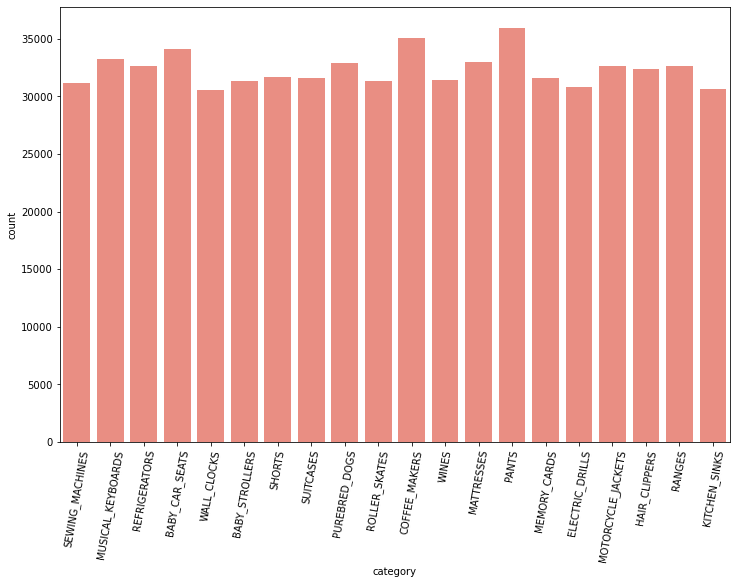

In [88]:
fig = plt.figure(figsize=(12,8))
seaborn.countplot(data=df, x='category', color="salmon")
plt.xticks(rotation=80)

 Notar que no es el caso para este dataset teniendo entre 30600 a 36000 de
 cantidad por cada categoría. Algo también a recalcar es la presencia de
 títulos repetidos para algunas de estas como se muestra en la siguiente tabla.

In [89]:
df[[category, title]].groupby(category).describe()

title         \
                    count unique   
category                           
BABY_CAR_SEATS      34163  34163   
BABY_STROLLERS      31353  31350   
COFFEE_MAKERS       35104  35085   
ELECTRIC_DRILLS     30820  30819   
HAIR_CLIPPERS       32372  32343   
KITCHEN_SINKS       30635  30635   
MATTRESSES          32967  32967   
MEMORY_CARDS        31564  31545   
MOTORCYCLE_JACKETS  32615  32615   
MUSICAL_KEYBOARDS   33222  32757   
PANTS               35973  35972   
PUREBRED_DOGS       32928  32806   
RANGES              32645  32645   
REFRIGERATORS       32635  32630   
ROLLER_SKATES       31371  31364   
SEWING_MACHINES     31129  31099   
SHORTS              31685  31660   
SUITCASES           31580  31580   
WALL_CLOCKS         30600  30600   
WINES               31399  31386   

                                                                            
                                                                  top freq  
category                                                                    
BABY_CAR_SEATS                                        Bebê Conforto      1  
BABY_STROLLERS                                       Quinny Buzz Xtra    2  
COFFEE_MAKERS                                  Nespresso Essenza Mini    2  
ELECTRIC_DRILLS      Dewalt Dwd210g 10-amp 1/2-inch Pistol-grip Drill    2  
HAIR_CLIPPERS                                     Maquina Wahl Legend    2  
KITCHEN_SINKS       Pileta Bacha Doble Esquinera Johnson Acero Axa...    1  
MATTRESSES          Colchão Solteiro Espuma D23 14cmx188cmx88cm Gr...    1  
MEMORY_CARDS            Cart?o De Memria Sandisk Sdsqunc-064g-zn3mn    2  
MOTORCYCLE_JACKETS  Jaqueta Alpinestars Stella T-gp Plus R V2 Rosa...    1  
MUSICAL_KEYBOARDS                               Teclado Casio Ctk 671    2  
PANTS                                                           Jeans    2  
PUREBRED_DOGS                                       Cachorro Pinscher    2  
RANGES              Cocina Industrial Patagon Chef W45 5 Hornallas...    1  
REFRIGERATORS                                          Frigobar Usado    2  
ROLLER_SKATES                                            Rollerblade     2  
SEWING_MACHINES                                   Maquina De Overlock    2  
SHORTS                                                   Short Jeans     2  
SUITCASES           Jogo De Malas De Viagem Europa Importway 3 Peç...    1  
WALL_CLOCKS         Relojes De Pared Estilo Vintage Decorados A Ma...    1  
WINES                                       Mendel Cabernet Sauvignon    2

 Si bien la frecuencia de estas repeticiones no es alta (de a lo sumo 2
 repeticiones), se dan en una pequeña fracción de títulos.

 Otro dato de interés es la proporción de publicaciones en español y portugués
 que se obtiene a través de la función `proportion` que determina este
 resultado agrupando por categorías. No obstante, tampoco se obtuvo una
 gran diferencia.

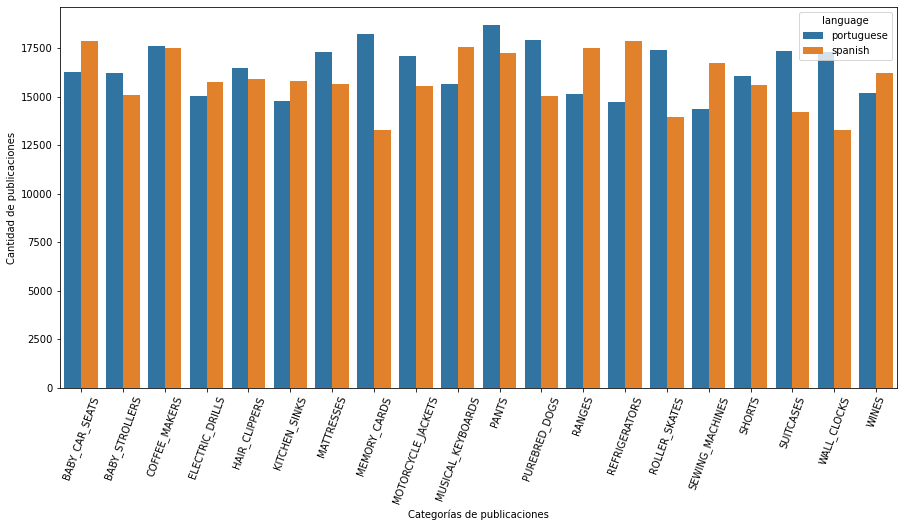

In [90]:
df_language_by_category = proportion(df, category, language).reset_index()
fig = plt.figure(figsize=(15,7))
seaborn.barplot(
    y=df_language_by_category["count"],
    x=df_language_by_category["category"],
    hue=df_language_by_category["language"],
    ci=None
)
plt.xticks(rotation=70)
plt.ylabel("Cantidad de publicaciones")
plt.xlabel("Categorías de publicaciones")
plt.ticklabel_format(style='plain', axis='y')

In [91]:
df_language_by_category

,category,language,count,total,proportion
0,BABY_CAR_SEATS,portuguese,16290,34163,0.476832
1,BABY_CAR_SEATS,spanish,17873,34163,0.523168
2,BABY_STROLLERS,portuguese,16244,31353,0.518100
3,BABY_STROLLERS,spanish,15109,31353,0.481900
4,COFFEE_MAKERS,portuguese,17607,35104,0.501567
5,COFFEE_MAKERS,spanish,17497,35104,0.498433
6,ELECTRIC_DRILLS,portuguese,15044,30820,0.488125
7,ELECTRIC_DRILLS,spanish,15776,30820,0.511875
8,HAIR_CLIPPERS,portuguese,16474,32372,0.508897
9,HAIR_CLIPPERS,spanish,15898,32372,0.491103


 También a partir de la siguiente tabla se puede observar la mínima y máxima
 proporción por categoría obteniendo que, de entre todas ellas, el idioma menos
 frecuente tiene al menos un 42% de las publicaciones. Las primeras 12 entre un
 43% y un 57%. Y las restantes entre un 48% y un 53%.

In [92]:
df_language_by_category[[category, "proportion"]] \
    .groupby(category) \
    .agg(
        min_proportion=("proportion", "min"),
        max_proportion=("proportion", "max")
    ).sort_values(by="min_proportion")

,min_proportion,max_proportion
category,,
MEMORY_CARDS,0.421588,0.578412
WALL_CLOCKS,0.433497,0.566503
ROLLER_SKATES,0.444551,0.555449
SUITCASES,0.450348,0.549652
REFRIGERATORS,0.451969,0.548031
PUREBRED_DOGS,0.456116,0.543884
SEWING_MACHINES,0.462431,0.537569
RANGES,0.463777,0.536223
MUSICAL_KEYBOARDS,0.471224,0.528776


 Si se analiza para el total de publicaciones se obtiene que del total de
 646760 publicaciones, 317768 (49.13%) son en español, 328992 (50.86%) son en
 portugués.

In [93]:
nof_items = len(df)
nof_items

646760

In [94]:
nof_spanish_items = len(df[df[language] == "spanish"])
(nof_spanish_items, nof_spanish_items / nof_items * 100)

(317768, 49.132290184921764)

In [95]:
nof_portugues_items = nof_items - nof_spanish_items
(nof_portugues_items, nof_portugues_items / nof_items * 100)

(328992, 50.867709815078236)

 ## Exploración de label quality
 Analogo al caso anterior, se analiza la proporción de publicaciones `reliable`
 y `unreliable` agrupando por categoría. A diferencia de los idiomas, hay gran
 disparidad en la calidad de las etiquetas siendo las menos confiables más
 abundantes. En particular, para ninguna categoría la proporción de `reliables`
 es mayor a 22.2945%. Otras categorías como `WINES` la cantidad de etiquetas
 confiables es incluso menor al 3%.

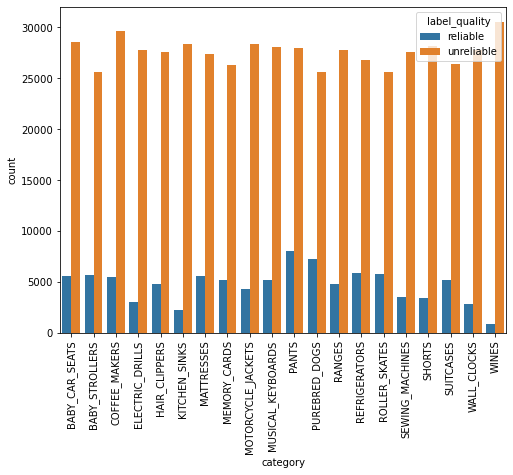

In [96]:
df_label_by_category = proportion(df, category, label_quality).reset_index()
fig = plt.figure(figsize=(8,6))
seaborn.barplot(
    y=df_label_by_category["count"],
    x=df_label_by_category["category"],
    hue=df_label_by_category["label_quality"],
    ci=None
)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

In [97]:
df_label_by_category.sort_values(by="proportion")


,category,label_quality,count,total,proportion
38,WINES,reliable,911,31399,0.029014
10,KITCHEN_SINKS,reliable,2257,30635,0.073674
36,WALL_CLOCKS,reliable,2854,30600,0.093268
6,ELECTRIC_DRILLS,reliable,3061,30820,0.099319
32,SHORTS,reliable,3480,31685,0.109831
30,SEWING_MACHINES,reliable,3533,31129,0.113495
16,MOTORCYCLE_JACKETS,reliable,4283,32615,0.131320
24,RANGES,reliable,4845,32645,0.148415
8,HAIR_CLIPPERS,reliable,4833,32372,0.149296
18,MUSICAL_KEYBOARDS,reliable,5160,33222,0.155319


 Nuevamente para el total de publicaciones, solamente el 94882 (14.67%) son
 `reliable` y 551878 (85.32%) son `unreliable`.

In [98]:
nof_items = len(df)
nof_items

646760

In [99]:
nof_reliable_labels = len(df[df[label_quality] == "reliable"])
(nof_reliable_labels, nof_reliable_labels / nof_items * 100)

(94882, 14.670356855711548)

In [100]:
nof_unreliable_labels = nof_items - nof_reliable_labels
(nof_unreliable_labels, nof_unreliable_labels / nof_items * 100)

(551878, 85.32964314428845)

 ## Relación entre el label quality y el idioma
 La confiabilidad de las etiquetas podría deberse a si están en español o
 portugués, por ello se optó por calcular la proporción de estas pero agrupadas
 por idioma.

In [101]:
df_label_by_language = proportion(df, language, label_quality)
df_label_by_language

count   total  proportion
language   label_quality                            
portuguese reliable        50519  328992    0.153557
           unreliable     278473  328992    0.846443
spanish    reliable        44363  317768    0.139608
           unreliable     273405  317768    0.860392

 Las proporciones de `reliable` para portugués y para español son parecidas, de
 un 15% y un 13% respectivamente. Recordar además que del total de
 publicaciones el 14,67 % son `reliable`. Esto hace que pensar que hay
 independencia entre las variables `language` y `label_quality`. Si se toman
 los cantidades de la columna `count`, tenemos cuatro casos posibles:


In [102]:
pd.crosstab(
    df[language],
    df[label_quality]
)

label_quality,reliable,unreliable
language,,
portuguese,50519,278473
spanish,44363,273405


 Las variables aleatorias $X_{A}$ y $X_{B}$ asociadas a las poblaciones
 `language` y `label_quality` son independientes si para cada $x_{A} \in
 \{spanish, portugues\}$ y $x_{B} \in \{reliable, unreliable\}$ valores de
 ambas poblaciones, se tiene que:

 $P(X_{A}=x_{A}, X_{B}=x_{B}) =
 P(X_{A}=x_{A})P(X_{B}=x_{B})$

 A continuación, para cada uno de los cuatro casos se calcula el cociente entre
 esas probabilidades. Para ello, se considera la cantidad publicaciones en la muestra
 que adoptan el valor $x_A$, `nof_A`

In [103]:
nof_items = len(df)
nof_A = df.groupby(language).size()
nof_A

language
portuguese    328992
spanish       317768
dtype: int64

 Similarmente la cantidad de publicaciones que adoptan el valor $x_B$, `nof_B`

In [104]:
nof_B = df.groupby(label_quality).size()
nof_B

label_quality
reliable       94882
unreliable    551878
dtype: int64

 Luego aquellas que coinciden en $x_A$ y $x_B$, `nof_AB`

In [105]:
nof_AB = df_label_by_language["count"]
nof_AB

language    label_quality
portuguese  reliable          50519
            unreliable       278473
spanish     reliable          44363
            unreliable       273405
Name: count, dtype: int64

 Luego se divide entre la cantidad de publicaciones para finalmente obtener

In [106]:
# First divide between @nof_B and @nof_AB * nof_items so a dataframe of shape
# @nof_AB is obtained
nof_A * (nof_B / (nof_AB * nof_items))

language    label_quality
portuguese  reliable         0.955369
            unreliable       1.008097
spanish     reliable         1.050824
            unreliable       0.991753
dtype: float64

 Como los valores son todos muy cercanos a 1, se puede concluir que `language` y
 `label_quality` son independientes.

 Se hará un gráfico de barras, donde en lugar de mostrar el total de
 publicaciones para `reliable` y `unreliable` por idioma, se exhibirá la
 `proporción`, para español, para portugués, y para ambos idiomas.

In [107]:
nof_reliables = len(df[df[label_quality] =="reliable"])
nof_items = len(df)

df_label_by_language = df_label_by_language.reset_index()
cols = list(df_label_by_language.columns)

both_reliable=[
    "both",
    "reliable",
    nof_reliables,
    nof_items,
    nof_reliables/nof_items
]
both_unreliable=[
    "both",
    "unreliable",
    nof_items - nof_reliables,
    nof_items,
    (nof_items - nof_reliables)/nof_items
]

In [108]:
df_label_by_language = df_label_by_language.append(
    {label:value for label, value in zip(cols, both_reliable)},
    ignore_index=True
)
df_label_by_language = df_label_by_language.append(
    {label:value for label, value in zip(cols, both_unreliable)},
    ignore_index=True
)
df_label_by_language

,language,label_quality,count,total,proportion
0,portuguese,reliable,50519,328992,0.153557
1,portuguese,unreliable,278473,328992,0.846443
2,spanish,reliable,44363,317768,0.139608
3,spanish,unreliable,273405,317768,0.860392
4,both,reliable,94882,646760,0.146704
5,both,unreliable,551878,646760,0.853296


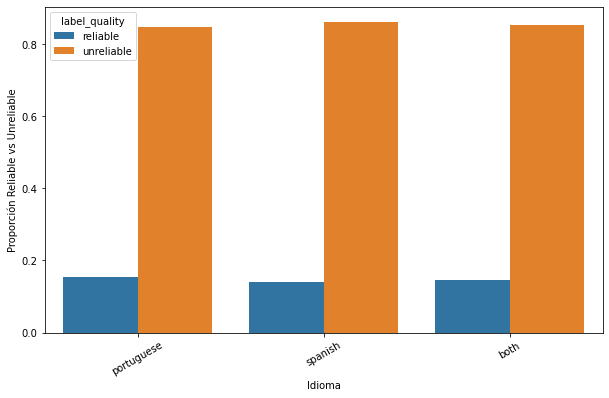

In [109]:
fig = plt.figure(figsize=(10,6))
seaborn.barplot(
    y=df_label_by_language["proportion"],
    x=df_label_by_language["language"],
    hue=df_label_by_language["label_quality"],
    ci=None
)
plt.xticks(rotation=30)
plt.ylabel("Proporción Reliable vs Unreliable")
plt.xlabel("Idioma")
plt.ticklabel_format(style='plain', axis='y')

 ## Exploración de la estructura de los títulos
 Para obtener una medida cuantitativa de la estructura que tiene el título de
 los articulos se optó por contabilizar por la cantidad de palabras, stopwords,
 dígitos, y caracteres especiales que aparecen en este por medio de las
 funciones `count_words`, `count_stopwords`, `count_digits`,
 `count_special_chars` aplicandose sobre cada item. (Puede tardar unos segundos
 debido al tamaño de la base de datos y a las operaciones que se realizan)

In [110]:
df_analysis_of_words = df[title] \
    .agg([
        count_words,
        count_stopwords,
        count_digits,
        count_special_chars
    ]).join(df[[title, category]])
df_analysis_of_words

,count_words,count_stopwords,count_digits,count_special_chars,title,category
0,3,0,0,0,Galoneira Semi Industrial,SEWING_MACHINES
1,5,1,0,0,Máquina De Coser Brother Industrial,SEWING_MACHINES
2,7,0,5,1,Teclado Casio Wk-240 76 Teclas Profissional St...,MUSICAL_KEYBOARDS
3,5,0,3,0,Heladera Gafa 380 Impecable Urgente,REFRIGERATORS
4,10,3,3,2,Butaca 6 Cuotas Sin Interes!! Para Auto Bebes...,BABY_CAR_SEATS
...,...,...,...,...,...,...
646755,5,0,1,0,Thank You Malbec X 6,WINES
646756,8,1,0,0,Cachorros Jack Rusell Terrier Pelo Corto Ultim...,PUREBRED_DOGS
646757,9,0,8,0,Colchão Box Casal Castor Vitagel Euro One Face...,MATTRESSES
646758,6,3,0,2,Maquina De Cortar El Pelo. Starex.,HAIR_CLIPPERS


In [111]:
df_analysis_of_words.describe()

,count_words,count_stopwords,count_digits,count_special_chars
count,646760.000000,646760.000000,646760.000000,646760.000000
mean,7.524940,0.665833,2.689880,0.780143
std,2.457988,0.865510,3.037443,1.151589
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,2.000000,0.000000
75%,9.000000,1.000000,4.000000,1.000000
max,29.000000,9.000000,36.000000,38.000000


 Notar que se tiene en promedio un total de 7.52 palabras por título. En cuanto
 a stopwords, a pesar de ser recurrentes en textos como conectivos, este no fue
 el caso, probablemente debido a la necesidad de hacer énfasis en el item a
 vender en la menor cantidad de palabras posibles. De manera similar ocurre con
 la cantidad de caracteres especiales usados. Sin embargo, se dan algunos
 valores atípicos como el uso de 38 caracteres especiales en una publicación.

 Para conocer la cantidad de palabras con las que se cuenta por categoría se
 utiliza el data frame anterior para calcular el promedio de ellas.

In [112]:
df_analysis_of_words.groupby(category).describe()

count_words                                            \
                         count      mean       std  min  25%   50%   75%   
category                                                                   
BABY_CAR_SEATS         34163.0  7.879694  2.767706  1.0  6.0   8.0  10.0   
BABY_STROLLERS         31353.0  7.251651  2.331940  1.0  5.0   8.0   9.0   
COFFEE_MAKERS          35104.0  7.231284  2.109062  1.0  6.0   8.0   9.0   
ELECTRIC_DRILLS        30820.0  8.143543  2.139638  1.0  7.0   8.0  10.0   
HAIR_CLIPPERS          32372.0  8.017144  2.097375  1.0  7.0   8.0   9.0   
KITCHEN_SINKS          30635.0  8.778619  2.037551  1.0  8.0   9.0  10.0   
MATTRESSES             32967.0  7.944611  2.153606  1.0  7.0   8.0   9.0   
MEMORY_CARDS           31564.0  9.218318  2.085176  1.0  8.0  10.0  11.0   
MOTORCYCLE_JACKETS     32615.0  7.395156  2.041704  1.0  6.0   8.0   9.0   
MUSICAL_KEYBOARDS      33222.0  6.869213  2.635319  1.0  5.0   7.0   9.0   
PANTS                  35973.0  7.024546  2.427197  1.0  5.0   7.0   9.0   
PUREBRED_DOGS          32928.0  5.543610  2.375694  1.0  4.0   5.0   7.0   
RANGES                 32645.0  7.878726  2.450383  1.0  6.0   8.0  10.0   
REFRIGERATORS          32635.0  6.527103  2.268562  1.0  5.0   7.0   8.0   
ROLLER_SKATES          31371.0  7.568837  2.688990  1.0  5.0   8.0  10.0   
SEWING_MACHINES        31129.0  7.019050  2.273622  1.0  5.0   7.0   9.0   
SHORTS                 31685.0  7.025217  2.447381  1.0  5.0   7.0   9.0   
SUITCASES              31580.0  8.226282  2.562095  1.0  7.0   8.0  10.0   
WALL_CLOCKS            30600.0  7.878007  2.164148  1.0  6.0   8.0   9.0   
WINES                  31399.0  7.320902  2.270392  1.0  6.0   7.0   9.0   

                         count_stopwords            ... count_digits        \
                     max           count      mean  ...          75%   max   
category                                            ...                      
BABY_CAR_SEATS      25.0         34163.0  1.148084  ...          3.0  25.0   
BABY_STROLLERS      20.0         31353.0  0.838580  ...          1.0  12.0   
COFFEE_MAKERS       22.0         35104.0  0.532817  ...          4.0  21.0   
ELECTRIC_DRILLS     24.0         30820.0  0.584263  ...          9.0  36.0   
HAIR_CLIPPERS       21.0         32372.0  1.166378  ...          4.0  27.0   
KITCHEN_SINKS       23.0         30635.0  0.750449  ...          8.0  32.0   
MATTRESSES          23.0         32967.0  0.374587  ...          8.0  20.0   
MEMORY_CARDS        24.0         31564.0  0.481688  ...          6.0  23.0   
MOTORCYCLE_JACKETS  18.0         32615.0  0.298605  ...          2.0  27.0   
MUSICAL_KEYBOARDS   23.0         33222.0  0.422491  ...          4.0  32.0   
PANTS               26.0         35973.0  0.460123  ...          2.0  22.0   
PUREBRED_DOGS       17.0         32928.0  0.733540  ...          0.0  16.0   
RANGES              24.0         32645.0  0.541859  ...          4.0  18.0   
REFRIGERATORS       20.0         32635.0  0.559277  ...          5.0  23.0   
ROLLER_SKATES       29.0         31371.0  0.559721  ...          4.0  24.0   
SEWING_MACHINES     24.0         31129.0  0.938514  ...          4.0  22.0   
SHORTS              19.0         31685.0  0.498627  ...          2.0  18.0   
SUITCASES           23.0         31580.0  0.824478  ...          4.0  26.0   
WALL_CLOCKS         24.0         30600.0  1.219379  ...          2.0  24.0   
WINES               16.0         31399.0  0.438326  ...          4.0  24.0   

                   count_special_chars                                     \
                                 count      mean       std  min  25%  50%   
category                                                                    
BABY_CAR_SEATS                 34163.0  0.742646  1.102622  0.0  0.0  0.0   
BABY_STROLLERS                 31353.0  0.690173  1.043307  0.0  0.0  0.0   
COFFEE_MAKERS                  35104.0  0.716642  1.053269  0.0  0.0  0.0   
ELECTRIC_DRIL

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BABY_CAR_SEATS'),
  Text(1, 0, 'BABY_STROLLERS'),
  Text(2, 0, 'COFFEE_MAKERS'),
  Text(3, 0, 'ELECTRIC_DRILLS'),
  Text(4, 0, 'HAIR_CLIPPERS'),
  Text(5, 0, 'KITCHEN_SINKS'),
  Text(6, 0, 'MATTRESSES'),
  Text(7, 0, 'MEMORY_CARDS'),
  Text(8, 0, 'MOTORCYCLE_JACKETS'),
  Text(9, 0, 'MUSICAL_KEYBOARDS'),
  Text(10, 0, 'PANTS'),
  Text(11, 0, 'PUREBRED_DOGS'),
  Text(12, 0, 'RANGES'),
  Text(13, 0, 'REFRIGERATORS'),
  Text(14, 0, 'ROLLER_SKATES'),
  Text(15, 0, 'SEWING_MACHINES'),
  Text(16, 0, 'SHORTS'),
  Text(17, 0, 'SUITCASES'),
  Text(18, 0, 'WALL_CLOCKS'),
  Text(19, 0, 'WINES')])

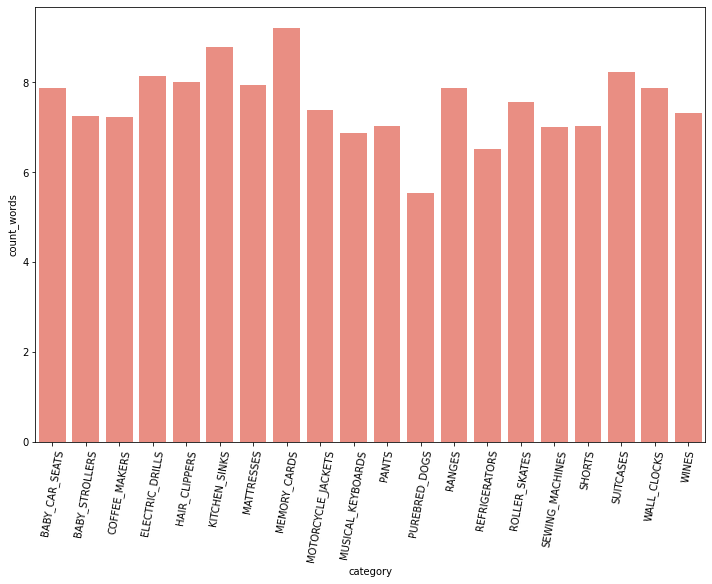

In [113]:
fig = plt.figure(figsize=(12,8))
seaborn.barplot(
    data=df_analysis_of_words.groupby(category).mean().reset_index(),
    x=category,
    y="count_words",
    color="salmon"
)
plt.xticks(rotation=80)

 Nuevamente no hay una disparidad fuerte entre la cantidad de palabras usadas
 en el título por las categoría.

 Para concluir el análisis se decidió considerar no solo la cantidad de
 palabras si no también la frecuencia en la que aparecen y si corresponden o
 tienen sentido con la categoría a la que fueron asociadas. Para ello, se
 remueven las stopwords, y los caracteres numéricos y especiales por medio de
 la función `remove_unimportant_words`. Luego para cada categoría se obtiene la
 frecuencia de todas las palabras que hayan aparecido en sus títulos para
 finalmente quedarse con las mejores 10. Algo a aclarar es que no se están
 aplicando técnicas de lematización al título si no que directamente se
 trabajan con su representación en minúsculas lo cual podría dar lugar a
 palabras que tienen una conjugación similar. Tampoco se está separando por
 palabras que correspondan solamente al español o al portugués llevando así a
 dar lugar a palabras frecuentes que tengan misma traducción. El siguiente data
 frame muestra estos resultados (La operación puede llevar unos
 segundos).

In [114]:
df_word_freq = df[title]\
    .apply(remove_unimportant_words) \
    .to_frame() \
    .join(df[category]) \
    .groupby(category) \
    .agg(" ".join)[title] \
    .apply(lambda s: nltk.FreqDist(word_tokenize(s)).most_common(10)) \
    .to_frame() \
    .rename(columns={"title":"top10_word_freq"}) \
    .reset_index()
df_word_freq

,category,top10_word_freq
0,BABY_CAR_SEATS,"[(auto, 13055), (kg, 11740), (butaca, 10273), ..."
1,BABY_STROLLERS,"[(carrinho, 14981), (bebê, 10015), (cochecito,..."
2,COFFEE_MAKERS,"[(cafetera, 15022), (cafeteira, 14190), (v, 73..."
3,ELECTRIC_DRILLS,"[(w, 16248), (taladro, 14368), (furadeira, 142..."
4,HAIR_CLIPPERS,"[(maquina, 9336), (wahl, 7920), (máquina, 6494..."
5,KITCHEN_SINKS,"[(bacha, 12567), (johnson, 10927), (cuba, 1052..."
6,MATTRESSES,"[(colchão, 15933), (x, 12718), (colchon, 8968)..."
7,MEMORY_CARDS,"[(gb, 27759), (sd, 16749), (micro, 16742), (ca..."
8,MOTORCYCLE_JACKETS,"[(jaqueta, 16633), (campera, 13618), (moto, 76..."
9,MUSICAL_KEYBOARDS,"[(teclado, 23205), (casio, 8659), (yamaha, 800..."


 Finalmente, si se elige alguna categoría en particular, por ejemplo
 `BABY_CAR_SEATS`, podemos obtener el siguiente gráfico de frecuencia.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'auto'),
  Text(1, 0, 'kg'),
  Text(2, 0, 'butaca'),
  Text(3, 0, 'bebe'),
  Text(4, 0, 'cadeira'),
  Text(5, 0, 'bebê'),
  Text(6, 0, 'cadeirinha'),
  Text(7, 0, 'huevito'),
  Text(8, 0, 'carro'),
  Text(9, 0, 'conforto')])

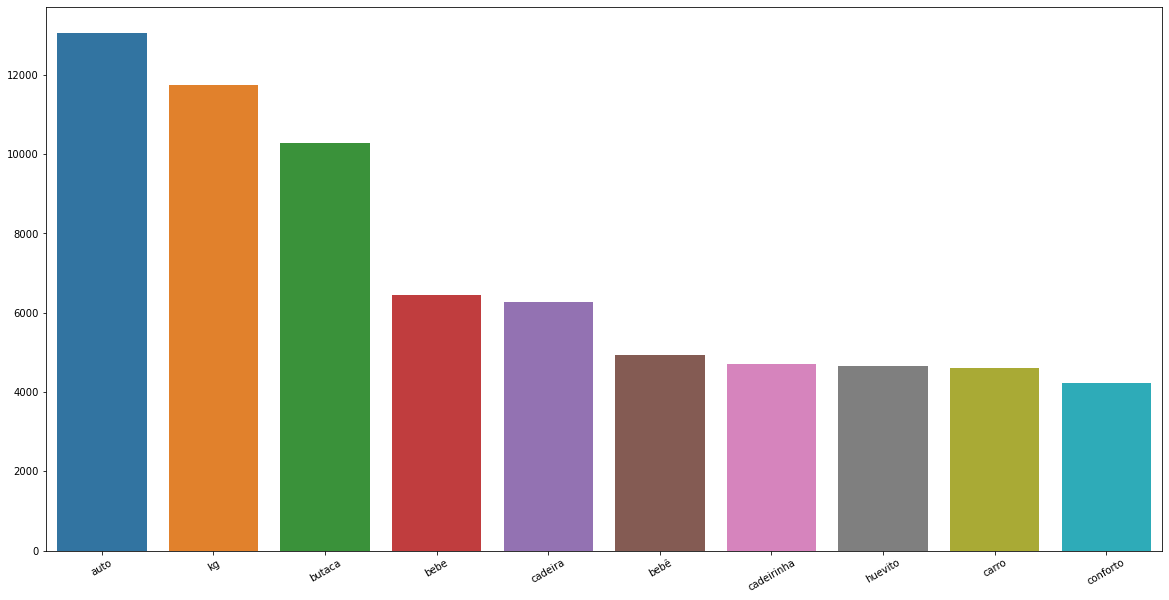

In [115]:
all_fdist = pd.Series(dict(
    df_word_freq[
        df_word_freq["category"] == "BABY_CAR_SEATS"
    ]["top10_word_freq"][0])
)
plt.figure(figsize=(20, 10))
seaborn.barplot(
    x=all_fdist.index,
    y=all_fdist.values
)
plt.xticks(rotation=30)

 Claramente palabras como *auto*, *kg*, *butaca*, *bebe*, *huevito*, etc,
 corresponden con las esperadas para la compra de asientos para bebé con una
 frecuencia superior a las 4000 para las que aparecen en el gráfico. Por otro
 lado notar como unidades de medida tales como el *kg* son también útiles para
 este tipo de compras y que salieron a la vista dado por la eliminación de
 dígitos.